<a href="https://colab.research.google.com/github/hemantborse/Practical-Application---Car-Pricing/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Read CSV in to auto dataset
auto = pd.read_csv('data/vehicles.csv')
auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [80]:
# there are lot of NaN in data , remove them
auto.dropna(inplace=True)
nan_check = auto.isna().sum()
print(nan_check)


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [81]:
auto.isnull().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


In [82]:

#some price rows shoing 0 value , lets remove/drop those rows
auto_no_all_zero_rows = auto[auto['price'] != 0]
auto_no_all_zero_rows.head(-100)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426045,7306744835,wausau,4995,2007.0,chevrolet,hhr lt,good,4 cylinders,gas,120772.0,clean,automatic,3GNDA33P47S615928,fwd,mid-size,hatchback,red,wi
426047,7306733327,wausau,15985,2015.0,buick,encore,excellent,4 cylinders,gas,47825.0,clean,automatic,KL4CJHSB7FB268171,4wd,compact,SUV,black,wi
426048,7306732436,wausau,5995,2008.0,chevrolet,impala ltz,good,6 cylinders,gas,119425.0,clean,automatic,2G1WT55N281309545,fwd,full-size,sedan,grey,wi
426049,7306726680,wausau,11895,2016.0,chevrolet,cruze,excellent,4 cylinders,gas,79053.0,clean,automatic,1G1BE5SM3G7276948,fwd,compact,sedan,red,wi


In [83]:
# Check Duplication
auto_no_all_zero_rows.duplicated().sum()

np.int64(0)

In [84]:
#Check datatype
auto_no_all_zero_rows.dtypes


,0
id,int64
region,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64


In [85]:
#drop id column as it is not relevant
auto_no_all_zero_rows = auto_no_all_zero_rows.drop('id', axis=1)

In [86]:
#Convert cylinders column from obj to int by extracting int value from data/value, this may reveal some interesting facts about data
auto_no_all_zero_rows['cylinders'] = auto_no_all_zero_rows['cylinders'].str.extract('(\\d+)').astype('Int64')

In [87]:
#Check statistics of data set, also ensure cylinders apperars in the result.
auto_no_all_zero_rows.describe()

,price,year,cylinders,odometer
count,32496.000000,32496.000000,32404.0,3.249600e+04
mean,16993.479013,2010.938269,6.017683,1.089832e+05
std,13219.394890,7.274987,1.692998,1.022710e+05
min,1.000000,1905.000000,3.0,0.000000e+00
25%,7500.000000,2008.000000,4.0,6.744975e+04
50%,13125.500000,2012.000000,6.0,1.055840e+05
75%,23395.000000,2015.000000,8.0,1.428455e+05
max,155000.000000,2022.000000,12.0,9.999999e+06


In [88]:
#! pip install -U kaleido
#!sudo apt update && sudo apt-get install libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxdamage1 libxfixes3 libxrandr2 libgbm1 libxkbcommon0 libpango-1.0-0 libcairo2 libasound2

In [89]:
#import os
#os.environ["BROWSER_PATH"] = "C:/Program Files/Google/Chrome/Application/chrome.exe"

#plotly line plot to observe year on x axis and price on y axis
fig = px.line(auto_no_all_zero_rows, x='year', y='price',color='manufacturer')
fig.show()
# Create the 'images' directory if it doesn't exist
#if not os.path.exists('images'):
#    os.makedirs('images')

#fig.write_image("YoY_Car_Prices")
#fig.write_image('images/YoY_Car_Prices.png')

In [90]:
# Lets analyse data on cylinders = 3

filtered_auto3 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 3]

px.line(filtered_auto3, x='year', y='price',color='manufacturer')



In [91]:
# Lets analyse data on cylinders = 4
filtered_auto4 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 4]

px.line(filtered_auto4, x='year', y='price',color='manufacturer')

In [92]:
# Lets analyse data on cylinders = 6
filtered_auto6 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 6]

px.line(filtered_auto6, x='year', y='price',color='manufacturer')

In [93]:
# Lets analyse data on cylinders = 8
filtered_auto8 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 8]

px.line(filtered_auto8, x='year', y='price',color='manufacturer')

In [94]:
# Lets analyse data on cylinders = 3
filtered_auto12 = auto_no_all_zero_rows[auto_no_all_zero_rows['cylinders'] == 12]

px.line(filtered_auto12, x='year', y='price',color='manufacturer')

**Observations** :

*   larger number of the cars are from 2015 to 2020 there are some outliers for example with ford where some prices are out of range.
*   3 and 12 capacity cylender cars are least in number in dataset where as more data available for 4,6 and 8 cylender capacity cars.


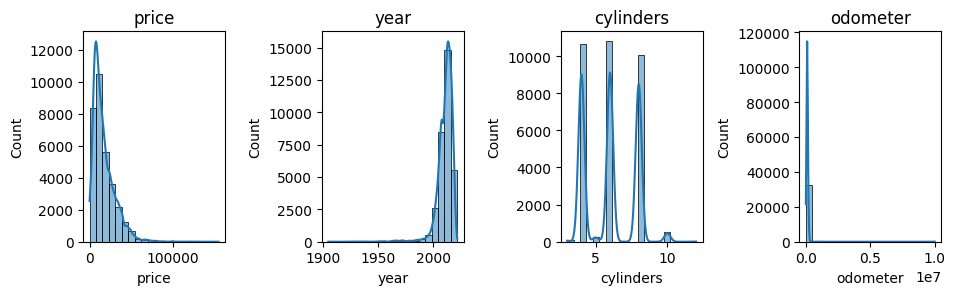

<Figure size 640x480 with 0 Axes>

In [95]:
# Distribution of Numerical Features
numerical_features = ['price','year','cylinders',	'odometer']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=auto_no_all_zero_rows[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()
plt.savefig('images/Distribution_of_Numerical_Features.png')

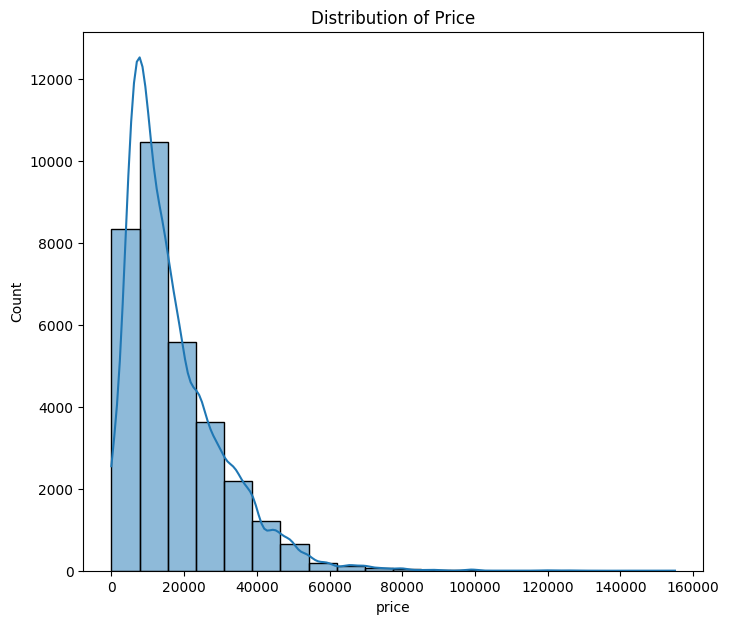

<Figure size 640x480 with 0 Axes>

In [96]:
# Price distribution analysis
plt.figure(figsize=(8, 7))
sns.histplot(data=auto_no_all_zero_rows['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()
plt.savefig('images/Price_Analysis.png')

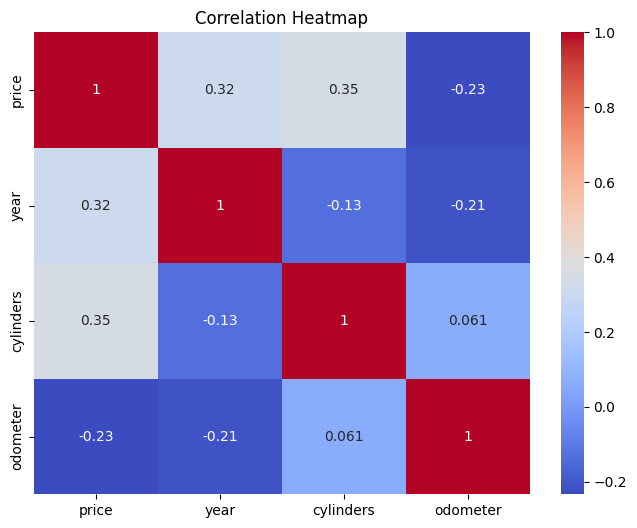

<Figure size 640x480 with 0 Axes>

In [97]:
# Correlation analysis of above numarical features
correlation_matrix = auto_no_all_zero_rows[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('images/Correlation_Analysis.png')